In [1]:
%matplotlib inline  

import itertools

#data & math libraries
import pandas as pd  # tables for mixed data
import numpy as np   # math and array functions

#data visualization
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

from os import listdir
from os.path import expanduser
from os.path import isfile, join


In [8]:
data_folder = './data/income_expenses_FY2015/'
excel_folder = data_folder + 'raw_excel/'


In [25]:
#Read the excel files, combine them and save to one file.

onlyfiles = [f for f in listdir(excel_folder) if isfile(join(excel_folder, f))]

df = pd.DataFrame()
for i in range(len(onlyfiles)):
    df1 = pd.read_excel(excel_folder+onlyfiles[i])
    df = df.append(df1)
    print(df1.shape)

print(df.shape)

df.head()

(19471, 11)
(22314, 11)
(18330, 11)
(19211, 11)
(20175, 11)
(24053, 11)
(20534, 11)
(19273, 11)
(23900, 11)
(30087, 11)
(19365, 11)
(22933, 11)
(259646, 12)


,Account,Amount,Date,Descr,Descriptio,Description,Fund,Line Descr,Period,Source,Unit,Year
0,401011,-123454.25,2014-10-31,Extracted Fare - Blue,NaN,To record October 2014 EZ Rid,30.0,EzRider Extracted Fare Oct 14,4,GJA,BARTD,2015
1,401011,-18444271.00,2014-10-31,Extracted Fare - Blue,NaN,To record October 2014 Extrac,30.0,Extr Fare-Blue Tkts Oct 14,4,GJA,BARTD,2015
2,401011,-100444.00,2014-10-31,Extracted Fare - Blue,NaN,To record October 2014 EZ Rid,30.0,EzRider AEDP Dict-Airli Oct 14,4,GJA,BARTD,2015
3,401011,-6227684.00,2014-10-31,Extracted Fare - Blue,NaN,To record October 2014 Extrac,30.0,Extr Fare-Translink HVD Oct14,4,GJA,BARTD,2015
4,401011,-15292418.00,2014-10-31,Extracted Fare - Blue,NaN,To record October 2014 Extrac,30.0,Extr Fare-Tlink ECash Oct 14,4,GJA,BARTD,2015


In [26]:
#Save file
df.to_csv(data_folder+'all_income_expenses_FY2015.csv', index=False)

In [27]:
#create a new column with month and year combined
df['month'] = df['Date'].dt.year.map(str) + '-' + df['Date'].dt.month.map(str)

#Group all line items into their account descriptions. 
df_1 = df[['Descr', 'Amount', 'month']].groupby(['month','Descr']).sum()
df_1 = df_1['Amount'].unstack('Descr')

#reverse amounts so negative is cost positive is revenue 
df_1 = df_1.fillna(0)*-1

#df_1 = df_1.applymap(lambda x:  '$ %.2f' % x)
df_1.T.head()

month,2014-10,2014-11,2014-12,2014-7,2014-8,2014-9,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6
Descr,,,,,,,,,,,,
AC Transit Feeder Agreement,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-2430000.00,-0.00,-270000.00,-270000.00,-270000.00
ACTC Measure BB - Paratransit,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,376171.50
ACTC Measure BB - Transit,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,125390.50
ADA Bus Service,-1114124.17,-1114124.17,-1113405.05,-1114124.17,-1114124.17,-1114124.17,-1114124.17,-1115233.93,-1114124.17,-1114124.17,-1114124.17,-1055562.98
ADA Revenue,70157.00,70157.00,70157.00,70157.00,70157.00,70157.00,70157.00,70157.00,70157.00,70157.00,70157.00,87960.58


In [38]:
#Save file
summary_file_name = 'summary_income_expenses_FY2015.xlsx'
writer = pd.ExcelWriter(data_folder+summary_file_name)
df_1.T.to_excel(writer, sheet_name='monthy')

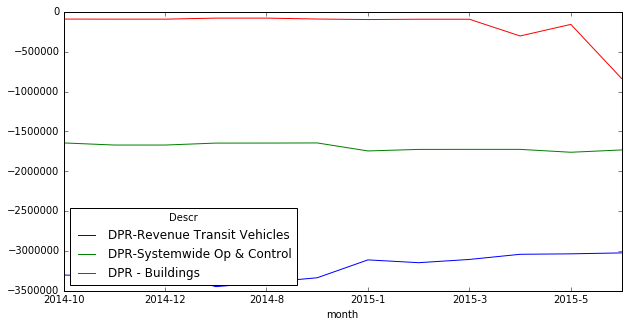

In [39]:
#Test plot
df_1[['DPR-Revenue Transit Vehicles', 'DPR-Systemwide Op & Control', 'DPR - Buildings']].plot()

In [40]:
df_2 = df[['Account', 'Descr', 'Amount']].groupby(['Account', 'Descr']).sum().sort_values(['Amount'])
df_2.head()

,,Amount
Account,Descr,
401011,Extracted Fare - Blue,-4.360651e+08
408020,Sales Tax Revenue,-2.331481e+08
601999,Dep Transferred to Accum Rev,-1.700253e+08
416485,FTA - 5337 Capital Improvement,-8.383333e+07
510201,Capital Reimbursements,-8.304158e+07


In [41]:
df_2.to_excel(writer, sheet_name='year')
writer.save()